In [2]:
import sys
sys.path.append('../../../utils')  # Adds the parent directory to the system path
sys.path.append('../../../models')  # Adds the parent directory to the system path


In [3]:
import numpy as np
import os


In [4]:
import utils as utils
import dataloader as dl

In [ ]:
class_name = 'bike'

In [ ]:
image_dir = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/images/512/{class_name}'
label_dir = f'/projects/0/gusr51794/srst_scratch_drive/binary_training/train/512/{class_name}'

In [ ]:
dataloader = dl.SRST_DataloaderGray(mask_dir=label_dir, image_dir=image_dir)

LEN 1606


In [ ]:
visualiser = utils.Visualiser(dataloader)

In [ ]:
visualiser.vis_random(1)

TypeError: Visualiser.vis_random() takes 1 positional argument but 2 were given

1


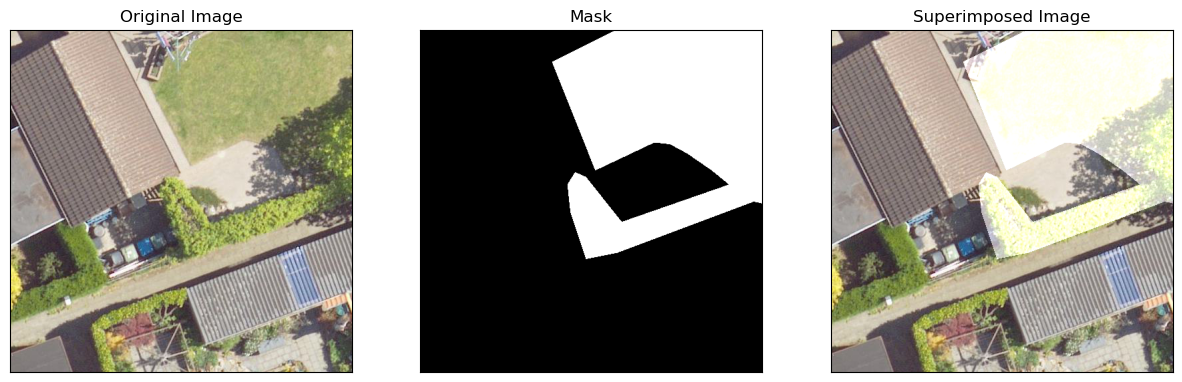

In [ ]:
visualiser.superimpose_images(idx=1, alpha=0.50, grayscale=True)

In [ ]:
svm_dataloader = dl.SRST_DataloaderSVM(mask_dir=label_dir, image_dir=image_dir)
visualiser_svm = utils.VisualiserSVM(dataloader=svm_dataloader)

LEN 200


1
MASK SHAPE (512, 512)
IMAGE SHAPE (512, 512, 3)


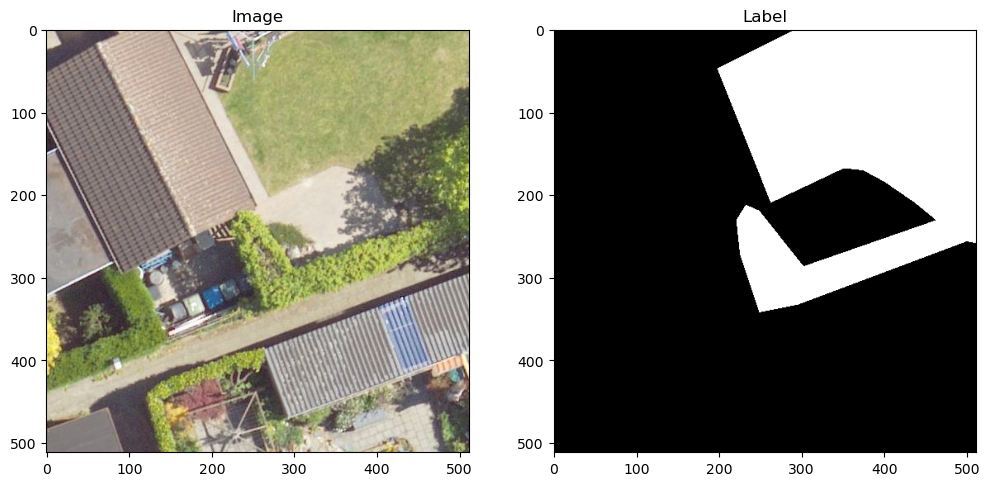

In [ ]:
visualiser_svm.vis_random(1)

In [ ]:
# Load yaml file
import yaml

with open('/home/sfonseka/dev/SRST/srst-dataloader/models/configs/deeplabv3_config.yaml') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [11]:
from DeepLabV3 import get_seg_model

In [20]:
# View the config
print(config)

{'MODEL': {'NAME': 'hrnet', 'PRETRAINED': False, 'pretrained_on': 'ImageNet', 'PRETRAINED_WEIGHTS': '${ORG_CWD}/pretrained/${MODEL.available_weights.${MODEL.pretrained_on}}', 'available_weights': {'ImageNet': 'hrnetv2_w48_imagenet_pretrained.pth', 'Paddle': 'HRNet_W48_C_ssld_pretrained.pth', 'Mapillary': 'mapillary_ocrnet.HRNet_Mscale_fast-rattlesnake.pth'}, 'ALIGN_CORNERS': True, 'INPUT_CHANNELS': 3, 'EXTRA': {'FINAL_CONV_KERNEL': 1, 'STAGE1': {'NUM_MODULES': 1, 'NUM_BRANCHES': 1, 'BLOCK': 'BOTTLENECK', 'NUM_BLOCKS': [4], 'NUM_CHANNELS': [64], 'FUSE_METHOD': 'SUM'}, 'STAGE2': {'NUM_MODULES': 1, 'NUM_BRANCHES': 2, 'BLOCK': 'BASIC', 'NUM_BLOCKS': [4, 4], 'NUM_CHANNELS': [48, 96], 'FUSE_METHOD': 'SUM'}, 'STAGE3': {'NUM_MODULES': 4, 'NUM_BRANCHES': 3, 'BLOCK': 'BASIC', 'NUM_BLOCKS': [4, 4, 4], 'NUM_CHANNELS': [48, 96, 192], 'FUSE_METHOD': 'SUM'}, 'STAGE4': {'NUM_MODULES': 3, 'NUM_BRANCHES': 4, 'BLOCK': 'BASIC', 'NUM_BLOCKS': [4, 4, 4, 4], 'NUM_CHANNELS': [48, 96, 192, 384], 'FUSE_METHOD':

In [ ]:
model = HighResolutionNetBaseline(config=config)